# Solução do desafio Ame
Solução desenvolvida por Danilo Morales Teixeira

18/09/2019

Importando as bibliotecas fundamentais para inicio do estudo e exploração inicial dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Carregando a base de dados presente no arquivo problem1_dataset.csv utilizando a biblioteca Pandas

In [2]:
dataset = pd.read_csv('problem1_dataset.csv')

Determinando número de linhas e colunas do dataset

In [3]:
linhas = dataset.shape[0]
colunas = dataset.shape[1]
print("Este dataset possui {} linhas e {} colunas".format(linhas,colunas))

Este dataset possui 180275 linhas e 21 colunas


Exibindo o nome das colunas para facilitar a análise exploratória de dados (EDA)

In [4]:
colunas = dataset.columns
print(colunas)

Index(['ITEM_ID', 'ALTURA', 'CAPACIDADE_(L)', 'COMPOSICAO', 'COR', 'FORMATO',
       'LARGURA', 'MARCA', 'PARA_LAVA_LOUCAS', 'PARA_MICRO_ONDAS', 'PESO',
       'PROFUNDIDADE', 'TEMPO_GARANTIA', 'TEM_FERRO_FUNDIDO', 'TEM_GRELHA',
       'TEM_TAMPA', 'TIPO_PRODUTO', 'TIPO_WOK', 'SESSION_ID', 'ITEM_PRICE',
       'INTERESTED'],
      dtype='object')


Exibindo as cinco primeiras linhas do dataset

In [5]:
print(dataset.head(5))

     ITEM_ID  ALTURA  CAPACIDADE_(L) COMPOSICAO       COR  FORMATO  LARGURA  \
0  264220456    30.5             NaN   ALUMINIO     VINHO      NaN     14.0   
1  238630912    22.0             NaN   ALUMINIO  COLORIDO      NaN     24.0   
2  218228122    24.0             NaN       INOX      INOX      NaN     20.0   
3  253661510    49.5             6.0   ALUMINIO  VERMELHO  REDONDO     41.5   
4  253661510    49.5             6.0   ALUMINIO  VERMELHO  REDONDO     41.5   

        MARCA PARA_LAVA_LOUCAS PARA_MICRO_ONDAS  ...  PROFUNDIDADE  \
0  LA CUISINE              NaN              NaN  ...          50.0   
1  TRAMONTINA               No               no  ...          40.0   
2  LA CUISINE              Yes               no  ...          20.0   
3  TRAMONTINA              Yes              NaN  ...          47.0   
4  TRAMONTINA              Yes              NaN  ...          47.0   

   TEMPO_GARANTIA  TEM_FERRO_FUNDIDO TEM_GRELHA TEM_TAMPA  TIPO_PRODUTO  \
0             3.0            

Analisando os dados das colunas, podemos verificar que as colunas ITEM_ID e SESSION_ID podem ser removidas uma vez que não fornecem informações úteis para o nosso estudo

Removendo as colunas ITEM_ID e SESSION_ID

In [6]:
dataset = dataset.drop(['ITEM_ID','SESSION_ID'],axis=1)

Exibindo novamente as cinco primeiras linhas para verificar se as duas colunas foram removidas

In [7]:
print(dataset.head(5))

   ALTURA  CAPACIDADE_(L) COMPOSICAO       COR  FORMATO  LARGURA       MARCA  \
0    30.5             NaN   ALUMINIO     VINHO      NaN     14.0  LA CUISINE   
1    22.0             NaN   ALUMINIO  COLORIDO      NaN     24.0  TRAMONTINA   
2    24.0             NaN       INOX      INOX      NaN     20.0  LA CUISINE   
3    49.5             6.0   ALUMINIO  VERMELHO  REDONDO     41.5  TRAMONTINA   
4    49.5             6.0   ALUMINIO  VERMELHO  REDONDO     41.5  TRAMONTINA   

  PARA_LAVA_LOUCAS PARA_MICRO_ONDAS   PESO  PROFUNDIDADE  TEMPO_GARANTIA  \
0              NaN              NaN    NaN          50.0             3.0   
1               No               no  150.0          40.0            12.0   
2              Yes               no  190.0          20.0             3.0   
3              Yes              NaN  120.0          47.0             NaN   
4              Yes              NaN  120.0          47.0             NaN   

  TEM_FERRO_FUNDIDO TEM_GRELHA  TEM_TAMPA  TIPO_PRODUTO TIPO_W

Analisando a distribuição de pessoas interessadas ou não nos produtos. Os valores 0 e 1 serão convertidos para os valores Sim e Não

In [8]:
dataset_tmp = dataset.copy()
dataset_tmp['INTERESTED'] = dataset['INTERESTED'].map({0 : 'Sim', 1 : 'Não'})

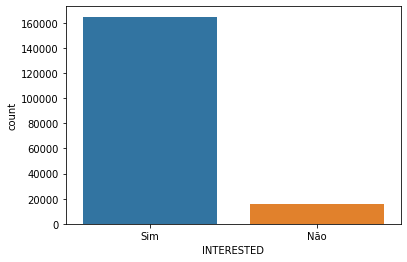

In [9]:
sns.countplot(x='INTERESTED',data=dataset_tmp);

Analisando a distribuição dos preços

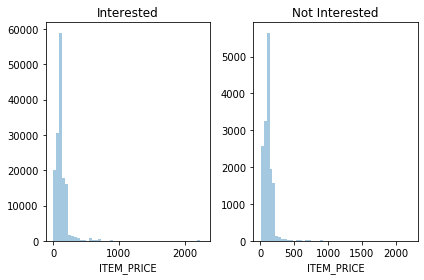

In [10]:
plt.subplot(1,2,1)
sns.distplot(dataset[dataset['INTERESTED'] == 0]['ITEM_PRICE'].dropna(),kde=False,label='Interessante');
plt.title('Interested')
plt.subplot(1,2,2)
sns.distplot(dataset[dataset['INTERESTED'] == 1]['ITEM_PRICE'].dropna(),kde=False,label='Não intersante');
plt.title('Not Interested')
plt.tight_layout()

# Observamos que os produtos que custam menos do que 500 tem níveis de interesse e desinteresse parecidos. Produtos custando acima de 100 tiveram baixa procura. 

Analisando a distribuição de altura dos produtos. Iremos utilizar uma distribuição normalizada para melhor compararmos dois dois casos

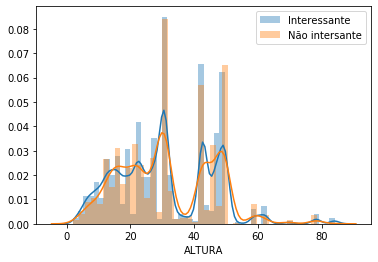

In [11]:
sns.distplot(dataset[dataset['INTERESTED'] == 0]['ALTURA'].dropna(),kde=True,label='Interessante');
sns.distplot(dataset[dataset['INTERESTED'] == 1]['ALTURA'].dropna(),kde=True,label='Não intersante');
plt.legend(loc='best');

# Observamos da distribuição normalizada que a altura do produto não alterou o interesse do cliente

Analisando a distribuição da capacidade dos produtos. Iremos utilizar uma distribuição normalizada para melhor compararmos dois dois casos

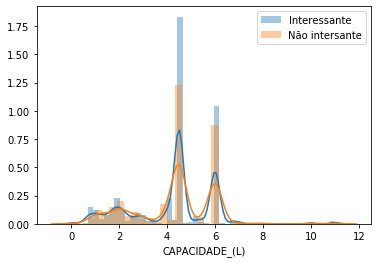

In [12]:
sns.distplot(dataset[dataset['INTERESTED'] == 0]['CAPACIDADE_(L)'].dropna(),kde=True,label='Interessante');
sns.distplot(dataset[dataset['INTERESTED'] == 1]['CAPACIDADE_(L)'].dropna(),kde=True,label='Não intersante');
plt.legend(loc='best');

# Observamos que a capacidade também não afetou o interesse pelo produto

Analisando a distribuição da largura dos produtos. Iremos utilizar uma distribuição normalizada para melhor compararmos dois dois casos

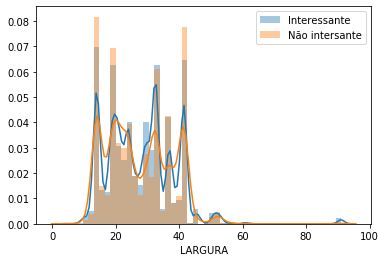

In [13]:
sns.distplot(dataset[dataset['INTERESTED'] == 0]['LARGURA'].dropna(),kde=True,label='Interessante');
sns.distplot(dataset[dataset['INTERESTED'] == 1]['LARGURA'].dropna(),kde=True,label='Não intersante');
plt.legend(loc='best');

# Observamos que a largura também não afetou o interesse pelo produto

Analisando a distribuição dos pesos dos produtos

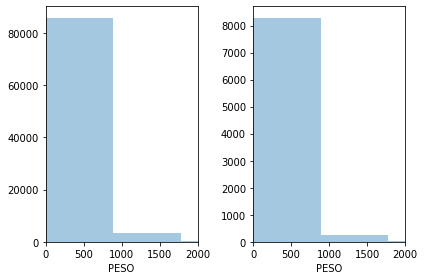

In [14]:
plt.subplot(1,2,1)
sns.distplot(dataset[dataset['INTERESTED'] == 0]['PESO'].dropna(),kde=False,label='Interessante');
plt.xlim([0,2000])
plt.subplot(1,2,2)
sns.distplot(dataset[dataset['INTERESTED'] == 1]['PESO'].dropna(),kde=False,label='Não intersante');
plt.xlim([0,2000])
plt.tight_layout()

# Observamos que o peso do produto não afetou o grau de interesse

Analisando o grau de interesse das diferentes marcas. Convertendo os NaNs para sem marca definida

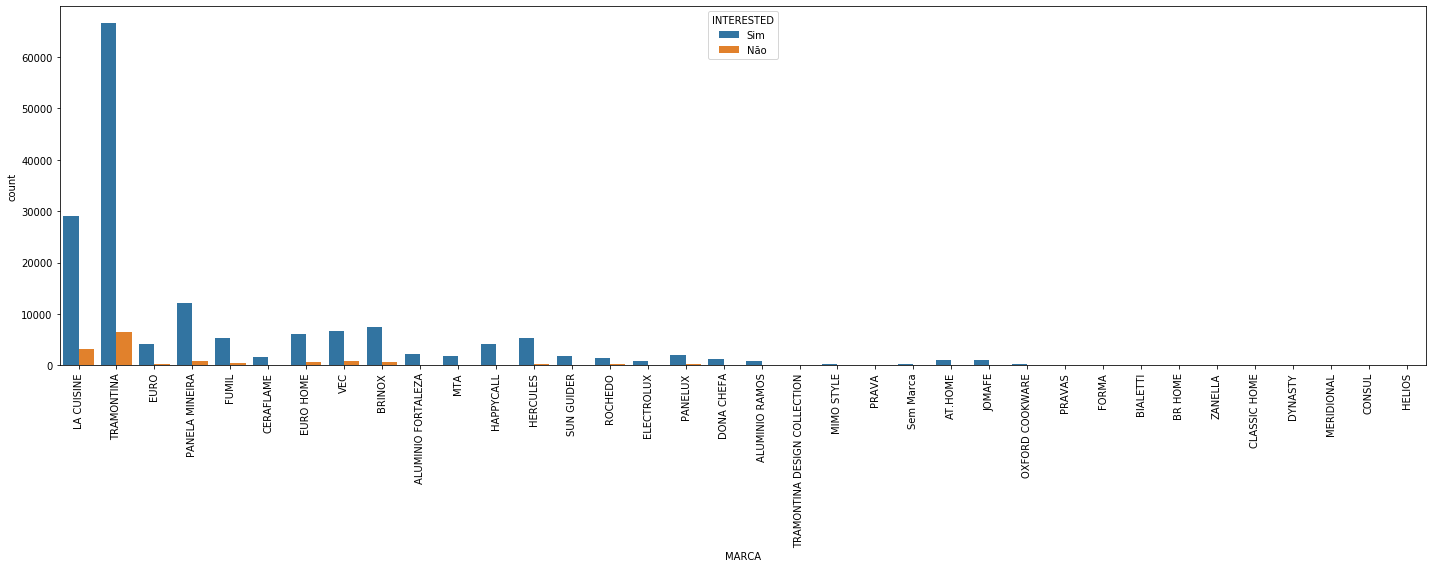

In [15]:
dataset_tmp['MARCA'] = dataset_tmp['MARCA'].fillna('Sem Marca')
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'MARCA', data = dataset_tmp, hue='INTERESTED')
plt.xticks(rotation='vertical')
plt.tight_layout()

# Este gráficos demonstra que a marca Tramontina possui maior interesse, seguida pela LA CUISINE. Este gráfico também nos mostra que ambas as marcas são as que apresentação maior taxa de desinteresse. Os produtos sem marca definida representam uma minoria

Analisando o grau de interesse das diferentes composições. Convetendo NaNs para desconhecido

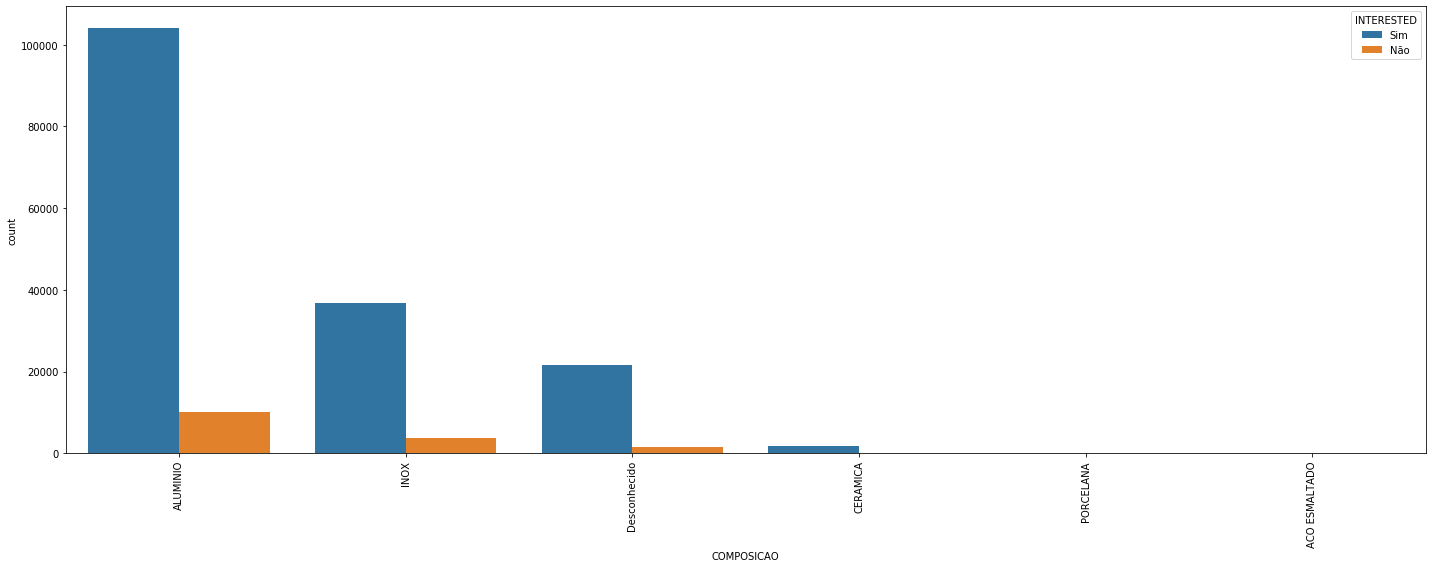

In [16]:
dataset_tmp['COMPOSICAO'] = dataset_tmp['COMPOSICAO'].fillna('Desconhecido')
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'COMPOSICAO', data = dataset_tmp, hue='INTERESTED')
plt.xticks(rotation='vertical')
plt.tight_layout()

# Observamos que produtos feitos de alumino dominam o interesse do cliente seguidos pelos de inox. Os produtos com composição desconhecida também tem atraído o interesse do cliente

Analisando o grau de interesse das em relação a cor. Convertendo NaNs para desconhecido

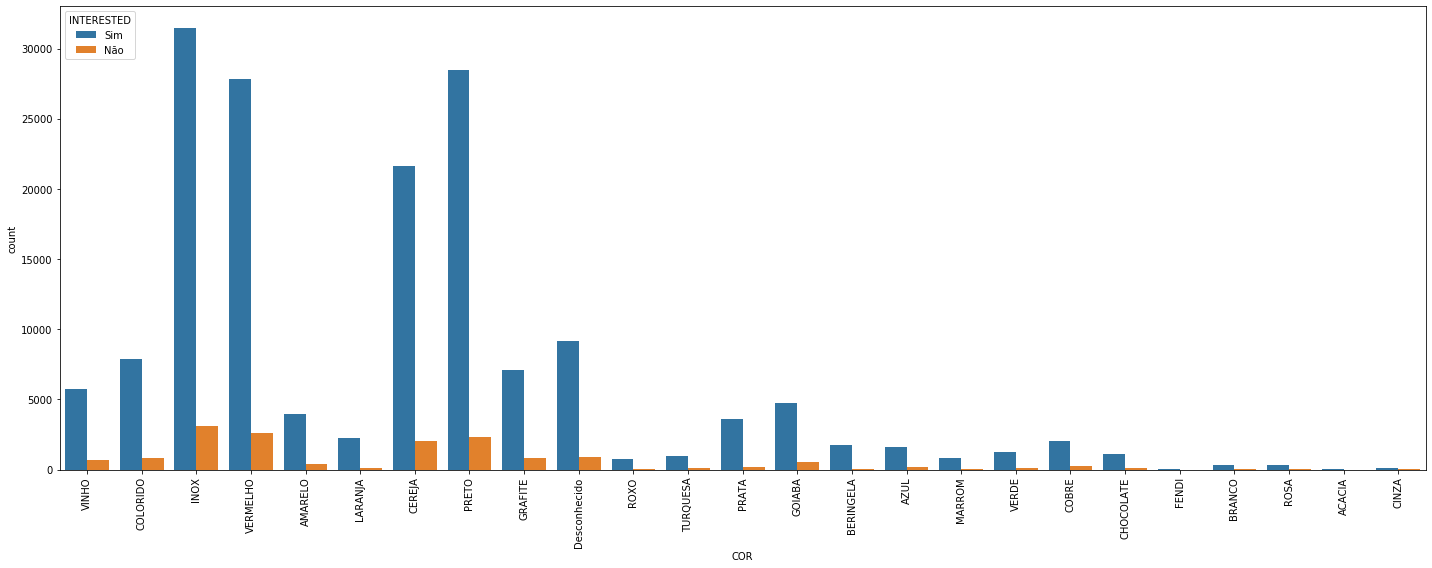

In [17]:
dataset_tmp['COR'] = dataset_tmp['COR'].fillna('Desconhecido')
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'COR', data = dataset_tmp, hue='INTERESTED')
plt.xticks(rotation='vertical')
plt.tight_layout()

# Os produtos com cores inox, vermelho, cereja e preto são os que mais cham o interesse do cliente

Analisando o grau de interesse das em relação ao formato. Convertendo NaNs para desconhecido

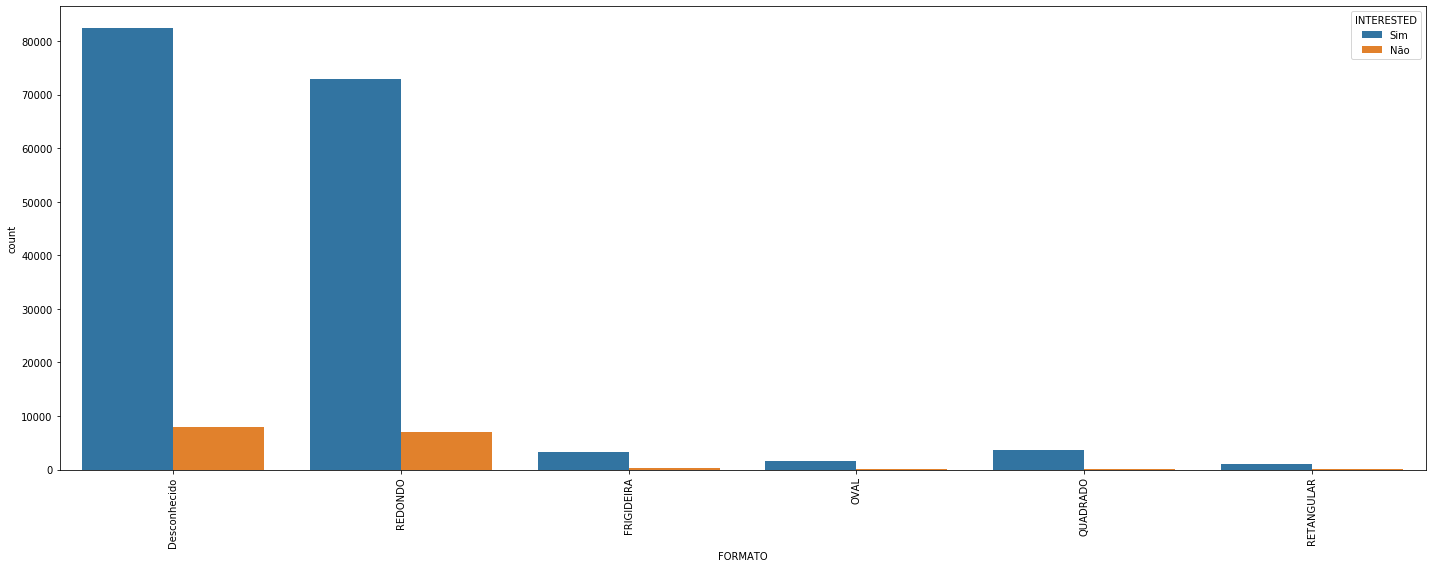

In [18]:
dataset_tmp['FORMATO'] = dataset_tmp['FORMATO'].fillna('Desconhecido')
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'FORMATO', data = dataset_tmp, hue='INTERESTED')
plt.xticks(rotation='vertical')
plt.tight_layout()

# Produtos com formato redondo e desconhecido receberam mais interesse do cliente e notamos que ambos apresentaram o mesmo grau de rejeição. 

Analisando a distribuição pelo tipo de produto

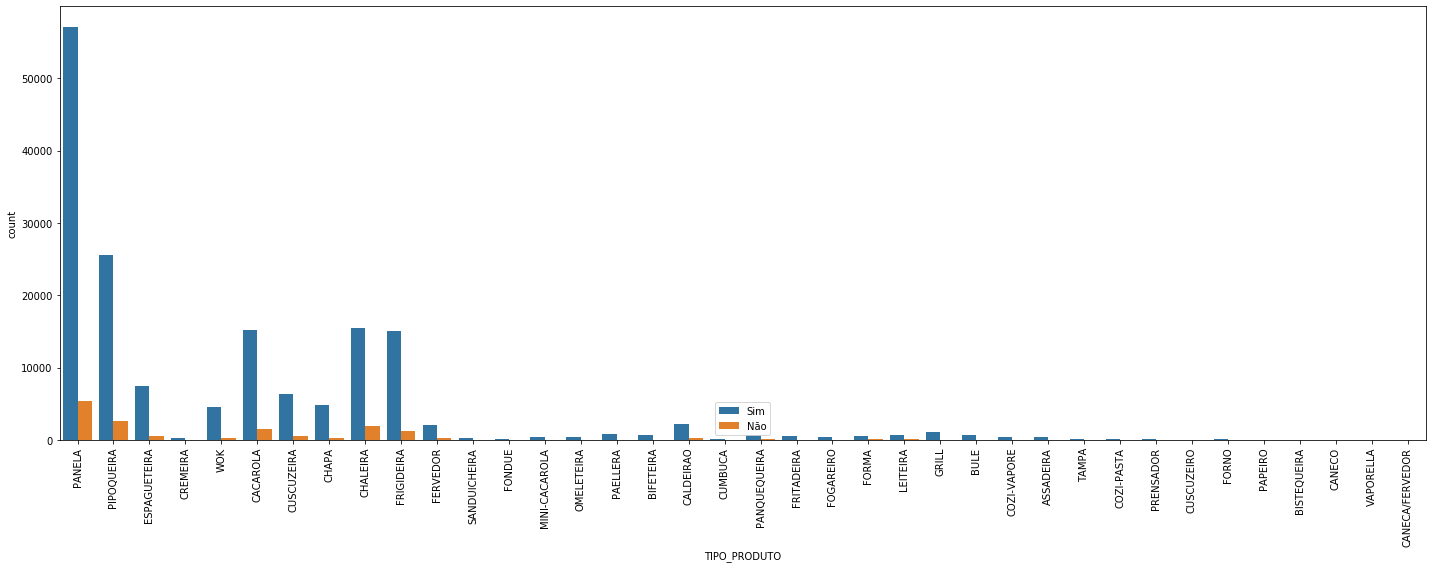

In [19]:
dataset_tmp['COR'] = dataset_tmp['TIPO_PRODUTO'].fillna('Desconhecido')
fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'TIPO_PRODUTO', data = dataset_tmp, hue='INTERESTED')
plt.xticks(rotation='vertical')
plt.legend(loc='best')
plt.tight_layout()

# As variáveis que mais definiram se um cliente irá ou não se interessar pelo produto são MARCA, FORMATO, COR, TIPO_PRODUTO e COMPOSISAO

Iremos agora converter as variáveis categóricas Marca, composição, cor, formato, para lavar louças, para microondas, tem_ferro_fundido, tem grelha, tipo de produto e tem wook para variáveis numéricas

Importanto bilioteca LabelEnconder para realizar esta conversão

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
dataset.head()

,ALTURA,CAPACIDADE_(L),COMPOSICAO,COR,FORMATO,LARGURA,MARCA,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,PESO,PROFUNDIDADE,TEMPO_GARANTIA,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_PRODUTO,TIPO_WOK,ITEM_PRICE,INTERESTED
0,30.5,NaN,ALUMINIO,VINHO,NaN,14.0,LA CUISINE,NaN,NaN,NaN,50.0,3.0,NAO,SIM,1.0,PANELA,NAO,199.990000,0.0
1,22.0,NaN,ALUMINIO,COLORIDO,NaN,24.0,TRAMONTINA,No,no,150.0,40.0,12.0,NAO,NAO,1.0,PIPOQUEIRA,NAO,105.112581,0.0
2,24.0,NaN,INOX,INOX,NaN,20.0,LA CUISINE,Yes,no,190.0,20.0,3.0,NAO,NAO,1.0,ESPAGUETEIRA,NAO,139.990000,0.0
3,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,NaN,120.0,47.0,NaN,NAO,NAO,1.0,PIPOQUEIRA,NAO,103.293333,1.0
4,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,NaN,120.0,47.0,NaN,NAO,NAO,1.0,PIPOQUEIRA,NAO,103.330242,0.0


Convertendo variável categórica marca para numérica. Convertendo NaNs para a label sem marca

In [22]:
dataset['MARCA'] = dataset['MARCA'].fillna('Sem Marca')
enconder_1 = LabelEncoder();
enconder_1.fit(dataset['MARCA'].values);

Verificando se as classes estão corretas

In [23]:
enconder_1.classes_

array(['ALUMINIO FORTALEZA', 'ALUMINIO RAMOS', 'AT.HOME', 'BIALETTI',
       'BR HOME', 'BRINOX', 'CERAFLAME', 'CLASSIC HOME', 'CONSUL',
       'DONA CHEFA', 'DYNASTY', 'ELECTROLUX', 'EURO', 'EURO HOME',
       'FORMA', 'FUMIL', 'HAPPYCALL', 'HELIOS', 'HERCULES', 'JOMAFE',
       'LA CUISINE', 'MERIDIONAL', 'MIMO STYLE', 'MTA', 'OXFORD COOKWARE',
       'PANELA MINEIRA', 'PANELUX', 'PRAVA', 'PRAVAS', 'ROCHEDO',
       'SUN GUIDER', 'Sem Marca', 'TRAMONTINA',
       'TRAMONTINA DESIGN COLLECTION', 'VEC', 'ZANELLA'], dtype=object)

In [24]:
marca_convertida = enconder_1.transform(dataset['MARCA'].values)

In [25]:
dataset['MARCA'] = marca_convertida

Convertendo variável categórica COMPOSICAO para numérica. Convertendo NaNs para a label desconhecido

In [26]:
dataset['COMPOSICAO'] = dataset['COMPOSICAO'].fillna('Desconhecido')
enconder_2 = LabelEncoder();
enconder_2.fit(dataset['COMPOSICAO'].values);

Verificando se as classe estão corretas

In [27]:
enconder_2.classes_

array(['ACO ESMALTADO', 'ALUMINIO', 'CERAMICA', 'Desconhecido', 'INOX',
       'PORCELANA'], dtype=object)

In [28]:
composicao_convertida = enconder_2.transform(dataset['COMPOSICAO'].values)

In [29]:
dataset['COMPOSICAO'] = composicao_convertida

Convertendo variável categórica COR para numérica. Convertendo NaNs para a label desconhecido

In [30]:
dataset['COR'] = dataset['COR'].fillna('Desconhecido')
enconder_3 = LabelEncoder();
enconder_3.fit(dataset['COR'].values);

Verificando se as classe estão corretas

In [31]:
enconder_3.classes_

array(['ACACIA', 'AMARELO', 'AZUL', 'BERINGELA', 'BRANCO', 'CEREJA',
       'CHOCOLATE', 'CINZA', 'COBRE', 'COLORIDO', 'Desconhecido', 'FENDI',
       'GOIABA', 'GRAFITE', 'INOX', 'LARANJA', 'MARROM', 'PRATA', 'PRETO',
       'ROSA', 'ROXO', 'TURQUESA', 'VERDE', 'VERMELHO', 'VINHO'],
      dtype=object)

In [32]:
cor_convertida = enconder_3.transform(dataset['COR'].values)

In [33]:
dataset['COR'] = cor_convertida

Convertendo variável categórica FORMATO para numérica. Convertendo NaNs para a label Sem Forma

In [34]:
dataset['FORMATO'] = dataset['FORMATO'].fillna('Sem Forma')
enconder_4 = LabelEncoder();
enconder_4.fit(dataset['FORMATO'].values);

Verificando se as classe estão corretas

In [35]:
enconder_4.classes_

array(['FRIGIDEIRA', 'OVAL', 'QUADRADO', 'REDONDO', 'RETANGULAR',
       'Sem Forma'], dtype=object)

In [36]:
forma_convertida = enconder_4.transform(dataset['FORMATO'].values)

In [37]:
dataset['FORMATO'] = forma_convertida

Convertendo variável categórica PARA_LAVA_LOUCAS para numérica. Convertendo NaNs para a label Talvez. Corrigindo os valores NAO para No

In [38]:
dataset['PARA_LAVA_LOUCAS'] = dataset['PARA_LAVA_LOUCAS'].fillna('Talvez')
dataset[dataset['PARA_LAVA_LOUCAS'] == 'NAO']['PARA_LAVA_LOUCAS'] = 'No'
enconder_5 = LabelEncoder();
enconder_5.fit(dataset['PARA_LAVA_LOUCAS'].values);

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Verificando as classes

In [39]:
enconder_5.classes_

array(['NAO', 'No', 'Talvez', 'Yes'], dtype=object)

In [40]:
lavar_louca_convertida = enconder_5.transform(dataset['PARA_LAVA_LOUCAS'].values)

In [41]:
dataset['PARA_LAVA_LOUCAS'] = lavar_louca_convertida

Convertendo variável categórica PARA_MICRO_ONDAS para numérica. Convertendo NaNs para a label Talvez.

In [42]:
dataset['PARA_MICRO_ONDAS'] = dataset['PARA_MICRO_ONDAS'].fillna('Talvez')
enconder_6 = LabelEncoder();
enconder_6.fit(dataset['PARA_MICRO_ONDAS'].values);

Verificando as classes

In [43]:
enconder_6.classes_

array(['Talvez', 'no', 'yes'], dtype=object)

In [44]:
para_micro_ondas_convertida = enconder_6.transform(dataset['PARA_MICRO_ONDAS'].values)

In [45]:
dataset['PARA_MICRO_ONDAS'] = para_micro_ondas_convertida

Convertendo variável categórica TEM_FERRO_FUNDIDO para numérica. Convertendo NaNs para a label Talvez.

In [46]:
dataset['TEM_FERRO_FUNDIDO'] = dataset['TEM_FERRO_FUNDIDO'].fillna('Talvez')
enconder_7 = LabelEncoder();
enconder_7.fit(dataset['TEM_FERRO_FUNDIDO'].values);

Verificando as classes

In [47]:
enconder_7.classes_

array(['NAO', 'SIM'], dtype=object)

In [48]:
ferro_fundido_convertida = enconder_7.transform(dataset['TEM_FERRO_FUNDIDO'].values)

In [49]:
dataset['TEM_FERRO_FUNDIDO'] = ferro_fundido_convertida

Convertendo variável categórica TEM_GRELHA para numérica. Convertendo NaNs para a label Talvez.

In [50]:
dataset['TEM_GRELHA'] = dataset['TEM_GRELHA'].fillna('Talvez')
enconder_8 = LabelEncoder();
enconder_8.fit(dataset['TEM_GRELHA'].values);

Verificando as classes

In [51]:
enconder_8.classes_

array(['NAO', 'SIM'], dtype=object)

In [52]:
grelha_convertida = enconder_8.transform(dataset['TEM_GRELHA'].values)

In [53]:
dataset['TEM_GRELHA'] = grelha_convertida

Convertendo variável categórica TIPO_PRODUTO para numérica. Convertendo NaNs para a label Desconhecido.

In [54]:
dataset['TIPO_PRODUTO'] = dataset['TIPO_PRODUTO'].fillna('Desconhecido')
enconder_9 = LabelEncoder();
enconder_9.fit(dataset['TIPO_PRODUTO'].values);

Verificando as classes

In [55]:
enconder_9.classes_

array(['NAO', 'SIM'], dtype=object)

In [56]:
tipo_produto_convertida = enconder_9.transform(dataset['TIPO_PRODUTO'].values)

In [57]:
dataset['TIPO_PRODUTO'] = tipo_produto_convertida

Convertendo variável categórica TIPO_WOK para numérica. Convertendo NaNs para a label Desconhecido.

In [58]:
dataset['TIPO_WOK'] = dataset['TIPO_WOK'].fillna('Desconhecido')
enconder_10 = LabelEncoder();
enconder_10.fit(dataset['TIPO_WOK'].values);

Verificando as classes

In [59]:
enconder_10.classes_

array(['NAO', 'SIM'], dtype=object)

In [60]:
tipo_wok_convertida = enconder_10.transform(dataset['TIPO_WOK'].values)

In [61]:
dataset['TIPO_WOK'] = tipo_wok_convertida

Verificando a quantidade de NaNs presentes nas variáveis ALTURA, CAPACIDADE_(L), LARGURA, PESO, PROFUNDIDADE, TEMPO_GARANTIA e ITEM_PRICE

In [62]:
n_nans_altura = dataset['ALTURA'].isna().sum()
n_nans_altura_normalizado = n_nans_altura * 100.0 / linhas
print("Esta coluna possui {} NaNs, o que corresponde a {:0,.2f} % do total".format(n_nans_altura,n_nans_altura_normalizado))

Esta coluna possui 9268 NaNs, o que corresponde a 5.14 % do total


In [63]:
n_nans_capacidade = dataset['CAPACIDADE_(L)'].isna().sum()
n_nans_capacidade_normalizado = n_nans_capacidade * 100.0 / linhas
print("Esta coluna possui {} NaNs, o que corresponde a {:0,.2f} % do total".format(n_nans_capacidade,n_nans_capacidade_normalizado))

Esta coluna possui 103604 NaNs, o que corresponde a 57.47 % do total


In [64]:
n_nans_largura = dataset['LARGURA'].isna().sum()
n_nans_largura_normalizado = n_nans_largura * 100.0 / linhas
print("Esta coluna possui {} NaNs, o que corresponde a {:0,.2f} % do total".format(n_nans_largura,n_nans_largura_normalizado))

Esta coluna possui 9268 NaNs, o que corresponde a 5.14 % do total


In [65]:
n_nans_peso = dataset['PESO'].isna().sum()
n_nans_peso_normalizado = n_nans_peso * 100.0 / linhas
print("Esta coluna possui {} NaNs, o que corresponde a {:0,.2f} % do total".format(n_nans_peso,n_nans_peso_normalizado))

Esta coluna possui 81751 NaNs, o que corresponde a 45.35 % do total


In [66]:
n_nans_profundidade = dataset['PROFUNDIDADE'].isna().sum()
n_nans_profundidade_normalizado = n_nans_profundidade * 100.0 / linhas
print("Esta coluna possui {} NaNs, o que corresponde a {:0,.2f} % do total".format(n_nans_profundidade,n_nans_profundidade_normalizado))

Esta coluna possui 9268 NaNs, o que corresponde a 5.14 % do total


In [67]:
n_nans_garantia = dataset['TEMPO_GARANTIA'].isna().sum()
n_nans_garantia_normalizado = n_nans_garantia * 100.0 / linhas
print("Esta coluna possui {} NaNs, o que corresponde a {:0,.2f} % do total".format(n_nans_garantia,n_nans_garantia_normalizado))

Esta coluna possui 57505 NaNs, o que corresponde a 31.90 % do total


In [68]:
n_nans_preco = dataset['ITEM_PRICE'].isna().sum()
n_nans_preco_normalizado = n_nans_preco * 100.0 / linhas
print("Esta coluna possui {} NaNs, o que corresponde a {:0,.2f} % do total".format(n_nans_preco,n_nans_preco_normalizado))

Esta coluna possui 13097 NaNs, o que corresponde a 7.27 % do total


Substituindo NaNs utilizando o método backward propagation

In [82]:
dataset['ITEM_PRICE'] = dataset['ITEM_PRICE'].fillna(method='bfill')
dataset['TEMPO_GARANTIA'] = dataset['TEMPO_GARANTIA'].fillna(method='bfill')
dataset['PROFUNDIDADE'] = dataset['PROFUNDIDADE'].fillna(method='bfill')
dataset['PESO'] = dataset['PESO'].fillna(method='bfill')
dataset['LARGURA'] = dataset['LARGURA'].fillna(method='bfill')
dataset['CAPACIDADE_(L)'] = dataset['CAPACIDADE_(L)'].fillna(method='bfill')
dataset['ALTURA'] = dataset['ALTURA'].fillna(method='bfill')

Verificando se todos os NaNs foram remodidos

In [83]:
dataset.isna().sum()

ALTURA               0
CAPACIDADE_(L)       0
COMPOSICAO           0
COR                  0
FORMATO              0
LARGURA              0
MARCA                0
PARA_LAVA_LOUCAS     0
PARA_MICRO_ONDAS     0
PESO                 0
PROFUNDIDADE         0
TEMPO_GARANTIA       0
TEM_FERRO_FUNDIDO    0
TEM_GRELHA           0
TEM_TAMPA            0
TIPO_PRODUTO         0
TIPO_WOK             0
ITEM_PRICE           0
INTERESTED           0
dtype: int64

Uma vez que todas as variáveis foram exploras e corrigidas, podemos passar a explorar técnicas de machine learning. Como o problema consiste em determinar se o produto será interessante ou não para o cliente, o método de regressão logística parece ser um bom método para se implementar inicialmente

Primeiramente devemos determinar as variaveis X e Y. Para o nosso problema a variável Y é INTERESTED e a variável X são as demais colunas

In [84]:
X = dataset.drop('INTERESTED',axis=1).values
Y = dataset['INTERESTED'].values

Vamos gerar uma amostra de treino e teste utilizando a função train_test_split. A amostra de treino terá 70% dos dados e a amostra de teste terá 30% dos dados

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.30, random_state=42)

Importanto biblioteca da Regressão Logística e realizando o procedimento da regressão utilizando os valores padrões da função. Iremos mais adiante obter os melhores parâmetros desta função

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
logreg = LogisticRegression(penalty='l2',solver='newton-cg',max_iter=10000)

In [89]:
logreg.fit(X_treino,Y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
previsao_logref = logreg.predict(X_teste)

Utilizando a matriz de confusão para comparar os resultados

In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
matriz_confusao = confusion_matrix(Y_teste, previsao_logref)
print(matriz_confusao)

[[49381     0]
 [ 4702     0]]


# Observamos que quando utilizamos todas as colunas, nenhum verdadeiro negativo é encontrado. Iremos agora testar incluindo apenas as colunas que se mostraram interessantes para o estudo

In [93]:
X_cols = ['MARCA','FORMATO','COR','TIPO_PRODUTO','COMPOSICAO']

In [94]:
X_new = dataset[X_cols].values
Y_new = dataset['INTERESTED'].values

In [95]:
X_treino2, X_teste2, Y_treino2, Y_teste2 = train_test_split(X_new, Y_new, test_size=0.30, random_state=42)

In [96]:
logreg2 = LogisticRegression(penalty='l2',solver='newton-cg',max_iter=10000)

In [97]:
logreg2.fit(X_treino2,Y_treino2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
previsao_logref_2 = logreg2.predict(X_teste2)

In [99]:
matriz_confusao = confusion_matrix(Y_teste2, previsao_logref_2)
print(matriz_confusao)

[[49381     0]
 [ 4702     0]]


# Observamos que mesmo neste caso a regressão logistica falhou em prever os verdadeiros negativos

Vamos agora utilizar o Decision Tree Classifier para tentar obter uma melhor performance no modelo

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=20000,max_features='log2')

In [102]:
dtc.fit(X_treino2,Y_treino2)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20000,
                       max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [103]:
previsao_dtc = dtc.predict(X_teste2)

In [104]:
matriz_confusao_dtc = confusion_matrix(Y_teste2, previsao_dtc)
print(matriz_confusao_dtc)

[[49381     0]
 [ 4702     0]]


# Observamos que o mesmo problema ocorre com o Decision Tree Classifier

Testaremos agora o Random Forest Classifier antes de implementarmos a rede neural

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=500,criterion='entropy')

In [107]:
rfc.fit(X_teste2,Y_teste2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=500, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [108]:
previsao_rfc = rfc.predict(X_teste2)

In [109]:
matriz_confusao_dtc = confusion_matrix(Y_teste2, previsao_rfc)
print(matriz_confusao_dtc)

[[49381     0]
 [ 4699     3]]


# O random forest classifier apresentou um resultado melhor comparado aos demais, porém, ainda assim falha em prever os verdadeiros negativos

Vamos agora implementar uma rede neural utilizando o Keras

In [176]:
from keras.models import Sequential
from keras.layers import Dense,LeakyReLU,ReLU
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.layers.advanced_activations import PReLU
from keras.optimizers import SGD
from keras.callbacks import ReduceLROnPlateau

In [219]:
def modelo_keras():
    model = Sequential()
    model.add(Dense(64, input_dim=18, activation='tanh'))
    model.add(Dense(128,activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','mse','mae','mape'])
    return model

In [222]:
modelo = modelo_keras()
modelo.fit(X_treino, Y_treino, epochs=10, batch_size=100, validation_data=(X_teste, Y_teste))

Train on 126192 samples, validate on 54083 samples
Epoch 1/10
126192/126192 [==============================] - 4s 35us/step - loss: 0.2959 - acc: 0.9128 - mean_squared_error: 0.0793 - mean_absolute_error: 0.1572 - mean_absolute_percentage_error: 79013939.2644 - val_loss: 0.2972 - val_acc: 0.9131 - val_mean_squared_error: 0.0796 - val_mean_absolute_error: 0.1435 - val_mean_absolute_percentage_error: 62705775.0173
Epoch 2/10
126192/126192 [==============================] - 3s 21us/step - loss: 0.2930 - acc: 0.9142 - mean_squared_error: 0.0785 - mean_absolute_error: 0.1564 - mean_absolute_percentage_error: 78187448.4619 - val_loss: 0.2954 - val_acc: 0.9131 - val_mean_squared_error: 0.0794 - val_mean_absolute_error: 0.1683 - val_mean_absolute_percentage_error: 90258480.9156
Epoch 3/10
126192/126192 [==============================] - 3s 22us/step - loss: 0.2923 - acc: 0.9142 - mean_squared_error: 0.0784 - mean_absolute_error: 0.1564 - mean_absolute_percentage_error: 78200697.8671 - val_loss

In [223]:
loss_keras, precisao_keras, mse_keras, mae_keras,mape_keras = modelo.evaluate(X_treino, Y_treino)

126192/126192 [==============================] - 4s 29us/step


In [224]:
print('Precisao: %.2f' % (precisao_keras*100))
print('Loss: %.2f' % (loss_keras*100))
print('MSE: %.2f' % (mse_keras*100))
print('MAE: %.2f' % (mae_keras*100))
print('MAPE: %.2f' % (mape_keras*100))

Precisao: 91.42
Loss: 29.09
MSE: 7.81
MAE: 15.90
MAPE: 8114898107.47


In [225]:
previsao_keras = modelo.predict_classes(X_teste)

In [226]:
matriz_confusao_keras = confusion_matrix(Y_teste, previsao_keras)
print(matriz_confusao_keras)

[[49381     0]
 [ 4702     0]]


In [230]:
X_cols = ['TIPO_PRODUTO','ITEM_PRICE','COMPOSICAO']#'ALTURA','PESO','ITEM_PRICE','FORMATO','TIPO_PRODUTO','COMPOSICAO']
X_new2 = dataset[X_cols].values
Y_new2 = dataset['INTERESTED'].values
X_treino3, X_teste3, Y_treino3, Y_teste3 = train_test_split(X_new2, Y_new2, test_size=0.30, random_state=42)

In [231]:
def modelo2_keras():
    model = Sequential()
    model.add(Dense(32, input_dim=3))
    model.add(ReLU())
    model.add(Dense(64))
    model.add(ReLU())
    model.add(Dense(1, activation='sigmoid'))
    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy','mse','mae','mape'])
    return model

In [234]:
modelo2 = modelo2_keras()
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.2, mode='auto')
modelo2.fit(X_treino3, Y_treino3, epochs=10, batch_size=100, callbacks=[learning_rate_reduction], validation_data=(X_teste3, Y_teste3))

Train on 126192 samples, validate on 54083 samples
Epoch 1/10
126192/126192 [==============================] - 5s 39us/step - loss: 1.3848 - acc: 0.9135 - mean_squared_error: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 707981.3380 - val_loss: 1.4013 - val_acc: 0.9131 - val_mean_squared_error: 0.0869 - val_mean_absolute_error: 0.0869 - val_mean_absolute_percentage_error: 8.6940
Epoch 2/10
126192/126192 [==============================] - 3s 28us/step - loss: 1.3826 - acc: 0.9142 - mean_squared_error: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 8.5782 - val_loss: 1.4013 - val_acc: 0.9131 - val_mean_squared_error: 0.0869 - val_mean_absolute_error: 0.0869 - val_mean_absolute_percentage_error: 8.6940
Epoch 3/10
126192/126192 [==============================] - 3s 27us/step - loss: 1.3826 - acc: 0.9142 - mean_squared_error: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 8.5782 - val_loss: 1.4013 - val_acc: 0.9131 - v

In [235]:
loss_keras2, precisao_keras2, mse_keras2, mae_keras2,mape_keras2 = modelo2.evaluate(X_treino3, Y_treino3)

126192/126192 [==============================] - 4s 34us/step


In [236]:
print('Precisao: %.2f' % (precisao_keras2*100))
print('Loss: %.2f' % (loss_keras2*100))
print('MSE: %.2f' % (mse_keras2*100))
print('MAE: %.2f' % (mae_keras2*100))
print('MAPE: %.2f' % (mape_keras2*100))

Precisao: 91.42
Loss: 138.26
MSE: 8.58
MAE: 8.58
MAPE: 857.82


In [238]:
previsao_keras2 = modelo2.predict_classes(X_teste3)

In [239]:
matriz_confusao_keras2 = confusion_matrix(Y_teste3, previsao_keras2)
print(matriz_confusao_keras2)

[[49381     0]
 [ 4702     0]]


# Diferentes implementações de redes neurais utilizando o keras levaram a um mesmo resultado comparando com o Random Forest Classifier por exemplo. Iremos fazer uma análise identica porém removendo todas as linhas que contenham qualquer valor do tipo NaN

In [241]:
dataset2 = pd.read_csv('problem1_dataset.csv')

In [243]:
dataset2 = dataset2.dropna(axis=0)

In [244]:
dataset2 = dataset2.drop(['ITEM_ID','SESSION_ID'],axis=1)

In [247]:
enconder_1a = LabelEncoder();
enconder_1a.fit(dataset2['MARCA'].values);
marca_convertida = enconder_1a.transform(dataset2['MARCA'].values)
dataset2['MARCA'] = marca_convertida

In [248]:
enconder_2a = LabelEncoder();
enconder_2a.fit(dataset2['COMPOSICAO'].values);
composicao_convertida = enconder_2a.transform(dataset2['COMPOSICAO'].values)
dataset2['COMPOSICAO'] = composicao_convertida

In [250]:
enconder_3a = LabelEncoder();
enconder_3a.fit(dataset2['COR'].values);
cor_convertida = enconder_3.transform(dataset2['COR'].values)
dataset2['COR'] = cor_convertida

In [251]:
enconder_4a = LabelEncoder();
enconder_4a.fit(dataset2['FORMATO'].values);
forma_convertida = enconder_4a.transform(dataset2['FORMATO'].values)
dataset2['FORMATO'] = forma_convertida

In [253]:
dataset2[dataset2['PARA_LAVA_LOUCAS'] == 'NAO']['PARA_LAVA_LOUCAS'] = 'No'
enconder_5a = LabelEncoder();
enconder_5a.fit(dataset2['PARA_LAVA_LOUCAS'].values);
lavar_louca_convertida = enconder_5.transform(dataset2['PARA_LAVA_LOUCAS'].values)
dataset2['PARA_LAVA_LOUCAS'] = lavar_louca_convertida

In [254]:
enconder_6a = LabelEncoder();
enconder_6a.fit(dataset2['PARA_MICRO_ONDAS'].values);
para_micro_ondas_convertida = enconder_6a.transform(dataset2['PARA_MICRO_ONDAS'].values)
dataset2['PARA_MICRO_ONDAS'] = para_micro_ondas_convertida

In [255]:
enconder_7a = LabelEncoder();
enconder_7a.fit(dataset2['TEM_FERRO_FUNDIDO'].values);
ferro_fundido_convertida = enconder_7a.transform(dataset2['TEM_FERRO_FUNDIDO'].values)
dataset2['TEM_FERRO_FUNDIDO'] = ferro_fundido_convertida

In [256]:
enconder_8a = LabelEncoder();
enconder_8a.fit(dataset2['TEM_GRELHA'].values);
grelha_convertida = enconder_8a.transform(dataset2['TEM_GRELHA'].values)
dataset2['TEM_GRELHA'] = grelha_convertida

In [257]:
enconder_9a = LabelEncoder();
enconder_9a.fit(dataset2['TIPO_PRODUTO'].values);
tipo_produto_convertida = enconder_9a.transform(dataset2['TIPO_PRODUTO'].values)
dataset2['TIPO_PRODUTO'] = tipo_produto_convertida

In [258]:
enconder_10a = LabelEncoder();
enconder_10a.fit(dataset2['TIPO_WOK'].values);
tipo_wok_convertida = enconder_10a.transform(dataset2['TIPO_WOK'].values)
dataset2['TIPO_WOK'] = tipo_wok_convertida

In [263]:
X = dataset2.drop('INTERESTED',axis=1).values
Y = dataset2['INTERESTED'].values

In [264]:
X_treino2, X_teste2, Y_treino2, Y_teste2 = train_test_split(X, Y, test_size=0.30, random_state=42)

In [265]:
logreg = LogisticRegression(penalty='l2',solver='newton-cg',max_iter=10000)

In [266]:
logreg.fit(X_treino2,Y_treino2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [267]:
previsao_logreg = logreg.predict(X_teste2)

In [268]:
matriz_confusao_logreg = confusion_matrix(Y_teste2, previsao_logreg)
print(matriz_confusao_logreg)

[[7484    0]
 [ 717    0]]


In [287]:
def modelo3_keras():
    model = Sequential()
    model.add(Dense(128, input_dim=18,activation='tanh'))
    model.add(Dense(128,activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','mse','mae','mape'])
    return model

In [289]:
modelo2 = modelo3_keras()
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.2, mode='auto')
modelo2.fit(X_treino2, Y_treino2, epochs=50, batch_size=50, callbacks=[learning_rate_reduction], validation_data=(X_teste2, Y_teste2))

Train on 19135 samples, validate on 8201 samples
Epoch 1/50
19135/19135 [==============================] - 3s 178us/step - loss: 0.2917 - acc: 0.9154 - mean_squared_error: 0.0777 - mean_absolute_error: 0.1532 - mean_absolute_percentage_error: 76490513.5981 - val_loss: 0.2986 - val_acc: 0.9126 - val_mean_squared_error: 0.0801 - val_mean_absolute_error: 0.1857 - val_mean_absolute_percentage_error: 109509071.9854
Epoch 2/50
19135/19135 [==============================] - 1s 56us/step - loss: 0.2889 - acc: 0.9158 - mean_squared_error: 0.0770 - mean_absolute_error: 0.1531 - mean_absolute_percentage_error: 76475534.1751 - val_loss: 0.2962 - val_acc: 0.9126 - val_mean_squared_error: 0.0796 - val_mean_absolute_error: 0.1782 - val_mean_absolute_percentage_error: 101161835.5371
Epoch 3/50
19135/19135 [==============================] - 1s 77us/step - loss: 0.2861 - acc: 0.9158 - mean_squared_error: 0.0766 - mean_absolute_error: 0.1532 - mean_absolute_percentage_error: 76733006.8356 - val_loss: 0.2

19135/19135 [==============================] - 1s 55us/step - loss: 0.2803 - acc: 0.9158 - mean_squared_error: 0.0756 - mean_absolute_error: 0.1516 - mean_absolute_percentage_error: 75827373.6462 - val_loss: 0.2886 - val_acc: 0.9126 - val_mean_squared_error: 0.0783 - val_mean_absolute_error: 0.1544 - val_mean_absolute_percentage_error: 75746054.9709

Epoch 00022: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Epoch 23/50
19135/19135 [==============================] - 1s 55us/step - loss: 0.2803 - acc: 0.9158 - mean_squared_error: 0.0756 - mean_absolute_error: 0.1516 - mean_absolute_percentage_error: 75840454.4176 - val_loss: 0.2886 - val_acc: 0.9126 - val_mean_squared_error: 0.0783 - val_mean_absolute_error: 0.1544 - val_mean_absolute_percentage_error: 75746904.7970
Epoch 24/50
19135/19135 [==============================] - 1s 56us/step - loss: 0.2803 - acc: 0.9158 - mean_squared_error: 0.0756 - mean_absolute_error: 0.1516 - mean_absolute_percentage_error: 75842460

Epoch 43/50
19135/19135 [==============================] - 1s 78us/step - loss: 0.2803 - acc: 0.9158 - mean_squared_error: 0.0756 - mean_absolute_error: 0.1516 - mean_absolute_percentage_error: 75840687.7042 - val_loss: 0.2886 - val_acc: 0.9126 - val_mean_squared_error: 0.0783 - val_mean_absolute_error: 0.1544 - val_mean_absolute_percentage_error: 75748132.1907

Epoch 00043: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Epoch 44/50
19135/19135 [==============================] - 1s 77us/step - loss: 0.2803 - acc: 0.9158 - mean_squared_error: 0.0756 - mean_absolute_error: 0.1516 - mean_absolute_percentage_error: 75840687.7032 - val_loss: 0.2886 - val_acc: 0.9126 - val_mean_squared_error: 0.0783 - val_mean_absolute_error: 0.1544 - val_mean_absolute_percentage_error: 75748132.1907
Epoch 45/50
19135/19135 [==============================] - 2s 79us/step - loss: 0.2803 - acc: 0.9158 - mean_squared_error: 0.0756 - mean_absolute_error: 0.1516 - mean_absolute_percentage_err

# Observou-se que mesmo removendo os NaNs de todo os dataset sem substituição, a precisão do modelo continuou muito parecida. Analise das variáveis nos mostrou que remover uma ou mais variável não afetou o resultado final